# Skin tone EDA

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme()

In [3]:
data = pd.read_csv("..\\ita_labels_128.csv")
data.head()

,image,ita,color_r,color_g,color_b
0,ISIC_0015719.jpg,43.861823,232,182,144
1,ISIC_0052212.jpg,41.217355,203,136,154
2,ISIC_0068279.jpg,29.224419,167,105,97
3,ISIC_0074268.jpg,46.712653,239,189,167
4,ISIC_0074311.jpg,54.644406,252,217,228


<Axes: xlabel='ita', ylabel='Density'>

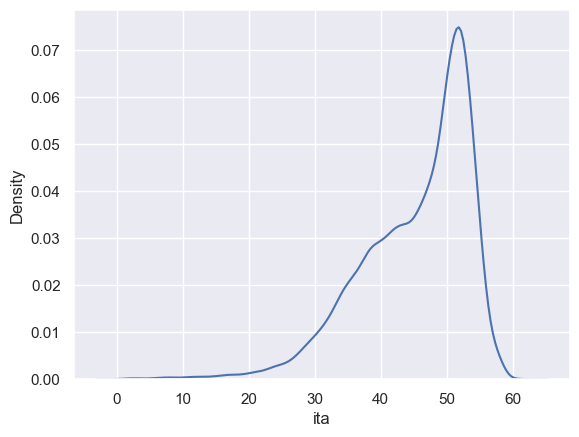

In [4]:
sns.kdeplot(data=data, x="ita")

## ITA to Fitzpatrick, 3 groups

In [5]:
def ita_to_ftp(ita):
    if ita >= 41:
        return "12"
    elif ita >= 19:
        return "34"
    else:
        return "56"    

In [6]:
data["fitzpatrick"] = data["ita"].map(ita_to_ftp)
data.head()

,image,ita,color_r,color_g,color_b,fitzpatrick
0,ISIC_0015719.jpg,43.861823,232,182,144,12
1,ISIC_0052212.jpg,41.217355,203,136,154,12
2,ISIC_0068279.jpg,29.224419,167,105,97,34
3,ISIC_0074268.jpg,46.712653,239,189,167,12
4,ISIC_0074311.jpg,54.644406,252,217,228,12


[Text(0, 0, '23957'), Text(0, 0, '8887'), Text(0, 0, '282')]

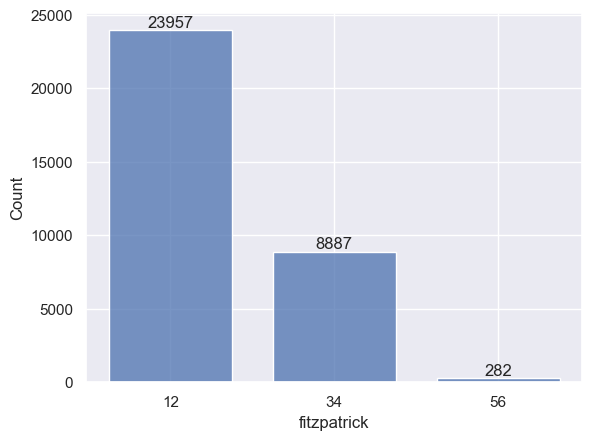

In [7]:
ax = sns.histplot(data=data, x="fitzpatrick", shrink=0.75)
ax.bar_label(ax.containers[0])

## ITA skin classification groups \[1\]

In [8]:
def ita_to_group(ita):
    if ita > 55:
        return "Very light"
    elif ita > 41:
        return "Light"
    elif ita > 28:
        return "Intermediate"
    elif ita > 10:
        return "Tan"
    elif ita > -30:
        return "Brown"
    else:
        return "Dark"   

In [9]:
data["group"] = data["ita"].map(ita_to_group)
data['group'] = pd.Categorical(data['group'], ["Very light", "Light", "Intermediate", "Tan", "Brown", "Dark"])
data.head()

,image,ita,color_r,color_g,color_b,fitzpatrick,group
0,ISIC_0015719.jpg,43.861823,232,182,144,12,Light
1,ISIC_0052212.jpg,41.217355,203,136,154,12,Light
2,ISIC_0068279.jpg,29.224419,167,105,97,34,Intermediate
3,ISIC_0074268.jpg,46.712653,239,189,167,12,Light
4,ISIC_0074311.jpg,54.644406,252,217,228,12,Light


[Text(0, 0, '1382'),
 Text(0, 0, '22575'),
 Text(0, 0, '8091'),
 Text(0, 0, '999'),
 Text(0, 0, '79')]

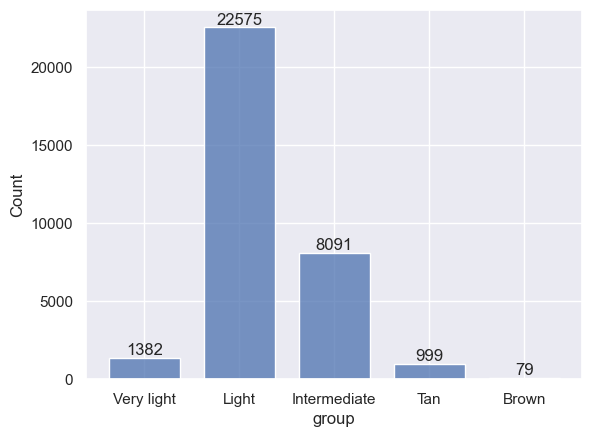

In [10]:
ax = sns.histplot(data=data, x="group", shrink=0.75)
ax.bar_label(ax.containers[0])

In [11]:
labels = pd.read_csv("e:\\ISIC 2020\\ISIC_2020_Training_GroundTruth.csv")
labels['image_name'] = labels["image_name"].map(lambda x: x + ".jpg")
labels.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011.jpg,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719.jpg,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212.jpg,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279.jpg,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268.jpg,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [12]:
joined = data.join(labels.set_index("image_name"), on="image")
joined

,image,ita,color_r,color_g,color_b,fitzpatrick,group,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_0015719.jpg,43.861823,232,182,144,12,Light,IP_3075186,female,45.0,upper extremity,unknown,benign,0
1,ISIC_0052212.jpg,41.217355,203,136,154,12,Light,IP_2842074,female,50.0,lower extremity,nevus,benign,0
2,ISIC_0068279.jpg,29.224419,167,105,97,34,Intermediate,IP_6890425,female,45.0,head/neck,unknown,benign,0
3,ISIC_0074268.jpg,46.712653,239,189,167,12,Light,IP_8723313,female,55.0,upper extremity,unknown,benign,0
4,ISIC_0074311.jpg,54.644406,252,217,228,12,Light,IP_2950485,female,40.0,lower extremity,unknown,benign,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33121,ISIC_5566237.jpg,51.340192,243,208,201,12,Light,IP_9042214,female,30.0,torso,unknown,benign,0
33122,ISIC_6074454.jpg,34.053269,172,131,110,34,Intermediate,IP_9802602,male,55.0,upper extremity,unknown,benign,0
33123,ISIC_7951995.jpg,30.068583,139,112,110,34,Intermediate,IP_3751440,female,50.0,NaN,unknown,benign,0
33124,ISIC_7951995.jpg,29.882832,139,112,109,34,Intermediate,IP_3751440,female,50.0,NaN,unknown,benign,0


In [13]:
duplicates = pd.read_csv("e:\\ISIC 2020\\ISIC_2020_Training_Duplicates.csv")
duplicates["image_name_2"] = duplicates["image_name_2"].map(lambda x: x + ".jpg")
duplicates["duplicate"] = 1
duplicates = duplicates.drop(columns=["image_name_1"])
joined = joined.join(duplicates.set_index("image_name_2"), on="image")
joined.fillna({'duplicate': 0}, inplace=True)
joined = joined.astype({"duplicate": "int"})
joined

,image,ita,color_r,color_g,color_b,fitzpatrick,group,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,duplicate
0,ISIC_0015719.jpg,43.861823,232,182,144,12,Light,IP_3075186,female,45.0,upper extremity,unknown,benign,0,0
1,ISIC_0052212.jpg,41.217355,203,136,154,12,Light,IP_2842074,female,50.0,lower extremity,nevus,benign,0,0
2,ISIC_0068279.jpg,29.224419,167,105,97,34,Intermediate,IP_6890425,female,45.0,head/neck,unknown,benign,0,0
3,ISIC_0074268.jpg,46.712653,239,189,167,12,Light,IP_8723313,female,55.0,upper extremity,unknown,benign,0,0
4,ISIC_0074311.jpg,54.644406,252,217,228,12,Light,IP_2950485,female,40.0,lower extremity,unknown,benign,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33121,ISIC_5566237.jpg,51.340192,243,208,201,12,Light,IP_9042214,female,30.0,torso,unknown,benign,0,0
33122,ISIC_6074454.jpg,34.053269,172,131,110,34,Intermediate,IP_9802602,male,55.0,upper extremity,unknown,benign,0,0
33123,ISIC_7951995.jpg,30.068583,139,112,110,34,Intermediate,IP_3751440,female,50.0,NaN,unknown,benign,0,0
33124,ISIC_7951995.jpg,29.882832,139,112,109,34,Intermediate,IP_3751440,female,50.0,NaN,unknown,benign,0,0


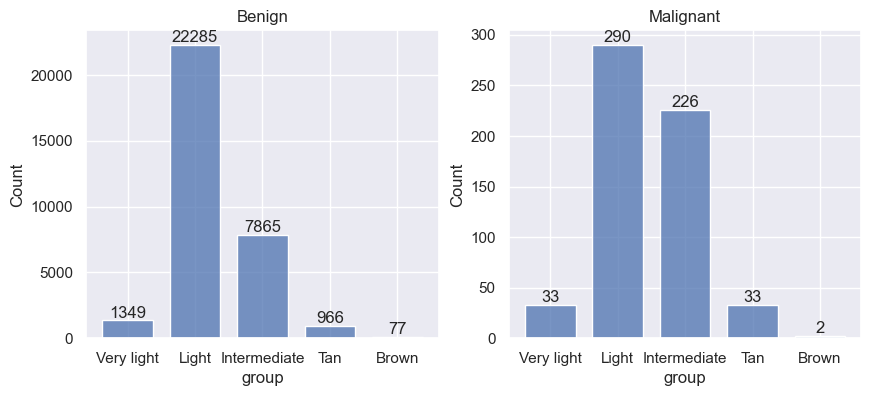

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4), sharey=False) 
benign = joined[joined["benign_malignant"]=="benign"]
malignant = joined[joined["benign_malignant"]=="malignant"]

sns.histplot(data=benign, x="group", shrink=0.75, ax=ax1)
ax1.bar_label(ax1.containers[0])
ax1.set_title("Benign")
sns.histplot(data=malignant, x="group", shrink=0.75, ax=ax2)
ax2.bar_label(ax2.containers[0])
ax2.set_title("Malignant")

plt.show()

[Text(0, 0, '1349'),
 Text(0, 0, '22285'),
 Text(0, 0, '7865'),
 Text(0, 0, '966'),
 Text(0, 0, '77')]

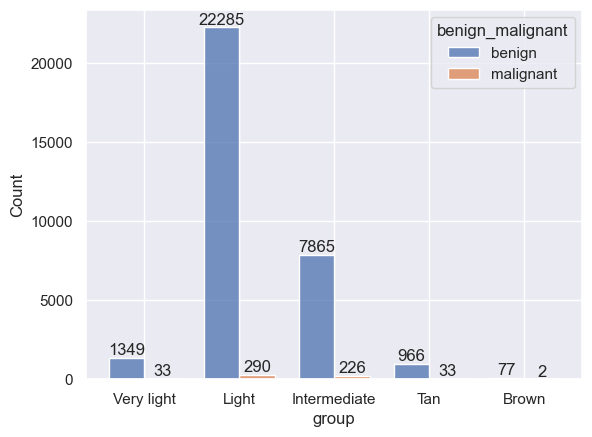

In [15]:
ax = sns.histplot(data=joined, x="group", hue="benign_malignant", multiple="dodge", shrink=0.75)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

## Visualize skin tone samples

In [16]:
import os
import cv2
from matplotlib.gridspec import GridSpec

DATA_ROOT = "E:\\ISIC 2020\\train"
sns.set_theme(style="white", palette=None)

In [ ]:
data.describe()

,ita,color_r,color_g,color_b
count,33126.000000,33126.000000,33126.000000,33126.000000
mean,45.283116,218.103363,175.776671,170.027893
std,8.230708,30.071444,37.609739,43.964002
min,0.000000,48.000000,17.000000,2.000000
25%,40.076563,198.000000,148.000000,139.000000
50%,47.489553,226.000000,185.000000,177.000000
75%,51.698006,243.000000,205.000000,205.000000
max,62.124490,255.000000,255.000000,255.000000


In [ ]:
filtered = data[data["group"] == "Tan"]
files = filtered["image"].map(lambda x: os.path.join(DATA_ROOT, x)).values
rgbs = filtered[["color_r", "color_g", "color_b"]].values
itas = filtered["ita"].values
files[:5], rgbs[:5], itas[:5]

(array(['E:\\ISIC 2020\\train\\ISIC_0154338.jpg',
        'E:\\ISIC 2020\\train\\ISIC_0155173.jpg',
        'E:\\ISIC 2020\\train\\ISIC_0164388.jpg',
        'E:\\ISIC 2020\\train\\ISIC_0170285.jpg',
        'E:\\ISIC 2020\\train\\ISIC_0186161.jpg'], dtype=object),
 array([[172,  81,  79],
        [161, 117,  63],
        [164,  99,  71],
        [152,  94,  53],
        [163,  80,  75]]),
 array([24.50265945, 27.1213034 , 25.52071253, 22.29058248, 23.19859051]))

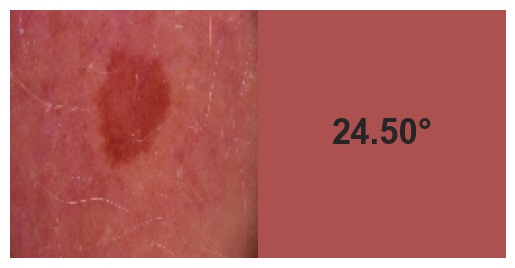

In [ ]:
fp = files[0]
rgb = rgbs[0]
ita = itas[0]

image = cv2.imread(fp)[:,:,::-1]
image = cv2.resize(image, (128,128))

fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.imshow(image)
ax.axis("off")
ax = fig.add_subplot(1,2,2)
ax.imshow([[rgb]])
ax.text(0, 0, f"{ita:.2f}°", va="center", ha="center", fontsize=25, fontweight='bold')
ax.axis("off")
fig.subplots_adjust(wspace=0)



(np.float64(-0.5), np.float64(0.5), np.float64(0.5), np.float64(-0.5))

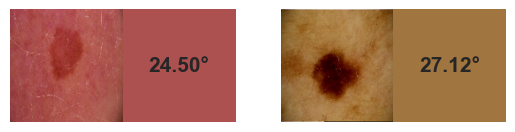

In [ ]:

fig = plt.figure()
gs0 = GridSpec(1, 2, figure=fig)

fp = files[0]
rgb = rgbs[0]
ita = itas[0]
image = cv2.imread(fp)[:,:,::-1]
image = cv2.resize(image, (128,128))

gs00 = gs0[0].subgridspec(1, 2, wspace=0)

ax = fig.add_subplot(gs00[0])
ax.imshow(image)
ax.axis("off")
ax = fig.add_subplot(gs00[1])
ax.imshow([[rgb]])
ax.text(0, 0, f"{ita:.2f}°", va="center", ha="center", fontsize=15, fontweight='bold')
ax.axis("off")

fp = files[1]
rgb = rgbs[1]
ita = itas[1]
image = cv2.imread(fp)[:,:,::-1]
image = cv2.resize(image, (128,128))

gs01 = gs0[1].subgridspec(1, 2, wspace=0)
ax = fig.add_subplot(gs01[0])
ax.imshow(image)
ax.axis("off")
ax = fig.add_subplot(gs01[1])
ax.imshow([[rgb]])
ax.text(0, 0, f"{ita:.2f}°", va="center", ha="center", fontsize=15, fontweight='bold')
ax.axis("off")


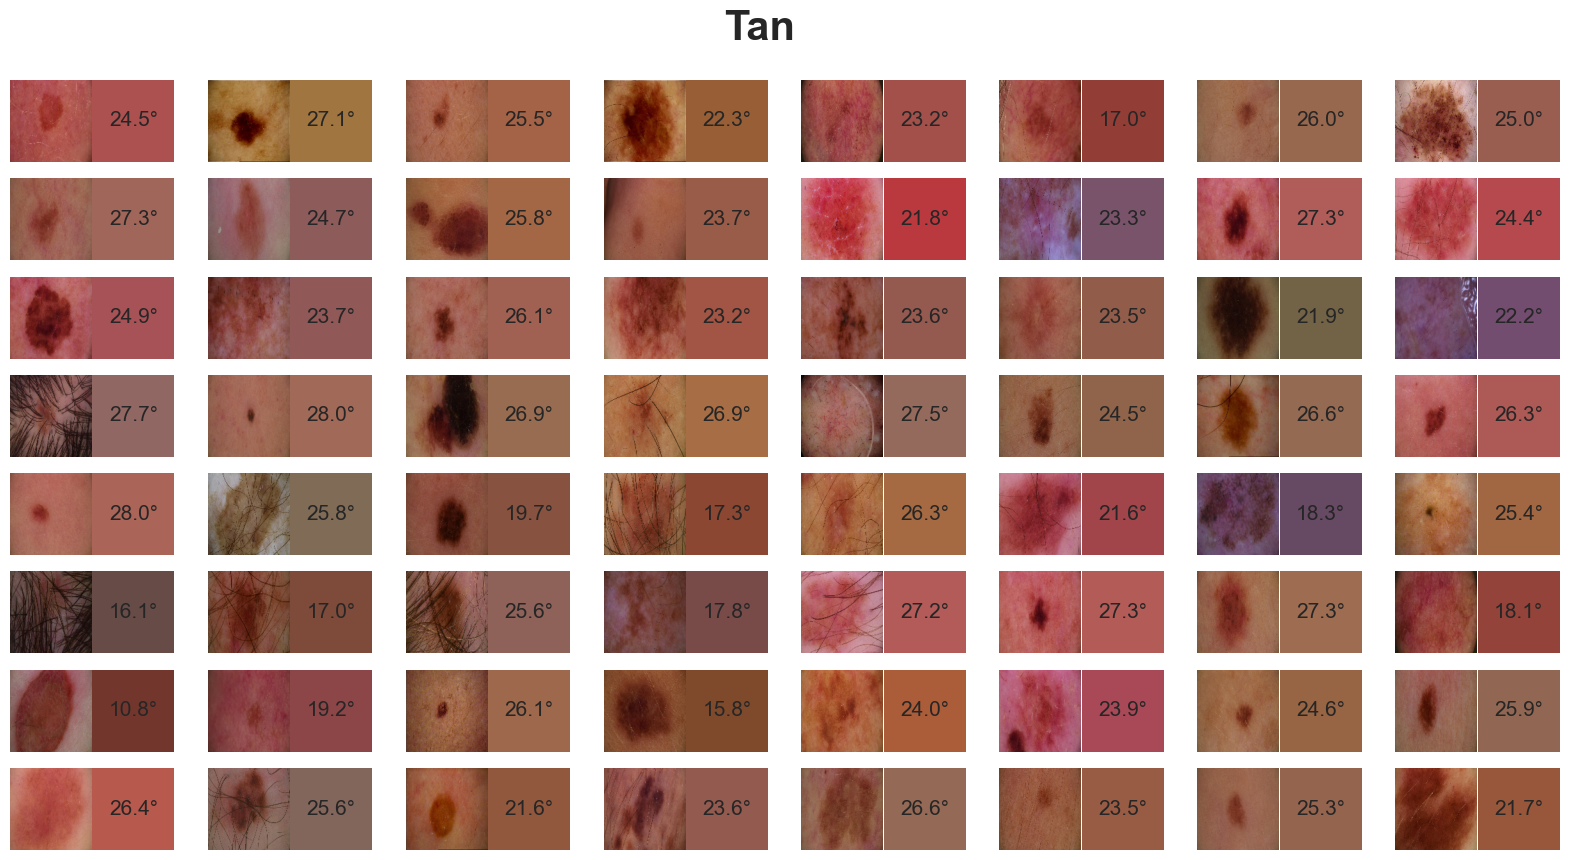

In [ ]:
fig = plt.figure(figsize=(20,10))
fig.suptitle("Tan", fontsize=30, fontweight='bold', y=0.95)
grid = GridSpec(8, 8, figure=fig)

for i, gs in enumerate(grid):
    fp, rgb, ita = files[i], rgbs[i], itas[i]
    image = cv2.imread(fp)[:,:,::-1]
    image = cv2.resize(image, (128,128))
    
    sub_grid = gs.subgridspec(1, 2, wspace=0)

    ax_left = fig.add_subplot(sub_grid[0])
    ax_left.imshow(image)
    ax_left.axis("off")

    ax_right = fig.add_subplot(sub_grid[1])
    ax_right.imshow([[rgb]])
    ax_right.text(0, 0, f"{ita:.1f}°", va="center", ha="center", fontsize=15)
    ax_right.axis("off")

fig.savefig("Tan.png")

In [ ]:
groups = ["Very light", "Light", "Intermediate", "Tan", "Brown"] #, "Dark"]

for group_name in groups:
    filtered = data[data["group"] == group_name]

    files = filtered["image"].map(lambda x: os.path.join(DATA_ROOT, x)).values
    rgbs = filtered[["color_r", "color_g", "color_b"]].values
    itas = filtered["ita"].values

    fig = plt.figure(figsize=(20,10))
    fig.suptitle(group_name, fontsize=30, fontweight='bold', y=0.95)
    grid = GridSpec(8, 8, figure=fig)

    for i, gs in enumerate(grid):
        fp, rgb, ita = files[i], rgbs[i], itas[i]
        image = cv2.imread(fp)[:,:,::-1]
        image = cv2.resize(image, (128,128))
        
        sub_grid = gs.subgridspec(1, 2, wspace=0)

        ax_left = fig.add_subplot(sub_grid[0])
        ax_left.imshow(image)
        ax_left.axis("off")

        ax_right = fig.add_subplot(sub_grid[1])
        ax_right.imshow([[rgb]])
        ax_right.text(0, 0, f"{ita:.1f}°", va="center", ha="center", fontsize=15)
        ax_right.axis("off")

    fig.savefig(f"{group_name}.png")
    plt.close()

In [ ]:
joined.to_csv("ISIC_2020_full.csv")

### Malignant samples

In [40]:
filtered = joined[(joined["group"] == "Tan") | (joined["group"] == "Brown")]
filtered = filtered[filtered["benign_malignant"] == "malignant"]

files = filtered["image"].map(lambda x: os.path.join(DATA_ROOT, x)).values
rgbs = filtered[["color_r", "color_g", "color_b"]].values
itas = filtered["ita"].values
files[:5], rgbs[:5], itas[:5], len(filtered)

(array(['E:\\ISIC 2020\\train\\ISIC_0274382.jpg',
        'E:\\ISIC 2020\\train\\ISIC_0369831.jpg',
        'E:\\ISIC 2020\\train\\ISIC_1393771.jpg',
        'E:\\ISIC 2020\\train\\ISIC_2027582.jpg',
        'E:\\ISIC 2020\\train\\ISIC_2141237.jpg'], dtype=object),
 array([[166,  82,  86],
        [152, 108,  81],
        [139,  89,  67],
        [112,  65,  25],
        [171, 106,  81]]),
 array([24.92847414, 26.86981309, 21.60223608, 11.65384059, 27.89727103]),
 35)

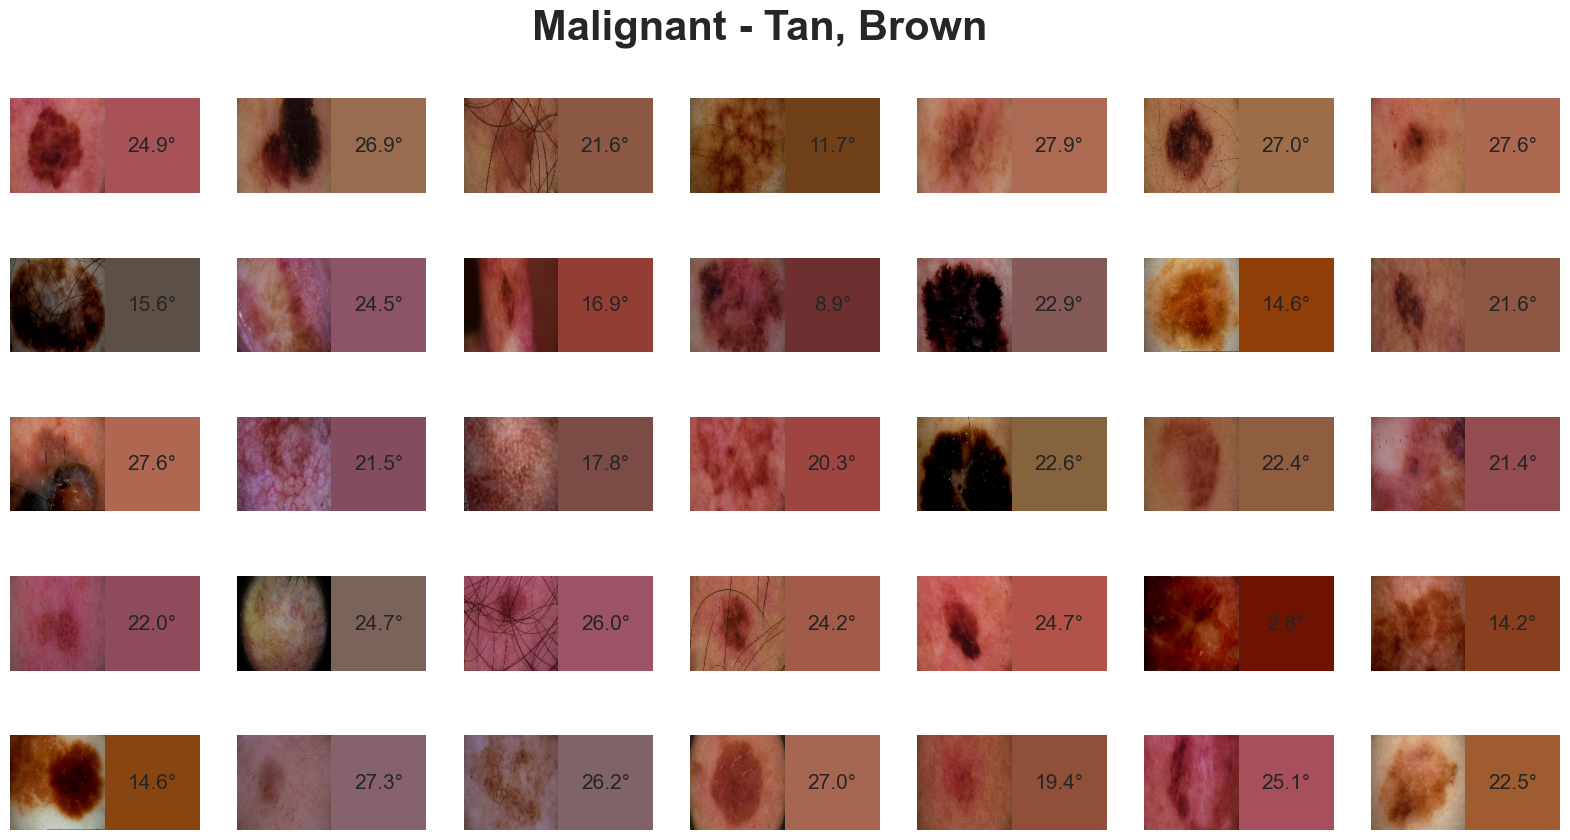

In [41]:

fig = plt.figure(figsize=(20,10))
fig.suptitle("Malignant - Tan, Brown", fontsize=30, fontweight='bold', y=0.95)
grid = GridSpec(5, 7, figure=fig)

for i, gs in enumerate(grid):
    fp, rgb, ita = files[i], rgbs[i], itas[i]
    image = cv2.imread(fp)[:,:,::-1]
    image = cv2.resize(image, (128,128))
    
    sub_grid = gs.subgridspec(1, 2, wspace=0)

    ax_left = fig.add_subplot(sub_grid[0])
    ax_left.imshow(image)
    ax_left.axis("off")

    ax_right = fig.add_subplot(sub_grid[1])
    ax_right.imshow([[rgb]])
    ax_right.text(0, 0, f"{ita:.1f}°", va="center", ha="center", fontsize=15)
    ax_right.axis("off")

fig.savefig("Malignant, Tan_Brown.png")

In [29]:
files[-8], files[-15]

('E:\\ISIC 2020\\train\\ISIC_7346739.jpg',
 'E:\\ISIC 2020\\train\\ISIC_4851366.jpg')

In [38]:
def get_ita_angle(color_rgb: np.ndarray) -> float:
    color_lab = cv2.cvtColor(np.uint8([[color_rgb]]), cv2.COLOR_RGB2LAB)[0][0]
    return np.arctan((color_lab[0] - 50) / color_lab[2]) * 180 / np.pi

corrected_colors = np.array([
    # [141,99,65],
    [133,109,81],
    [135,107,95],
    [165,159,140],
    [192,197,179],
    [190,166,138],
])
corrected_itas = list(map(get_ita_angle, corrected_colors))
corrected_itas

[np.float64(26.095424157388344),
 np.float64(27.057552910841324),
 np.float64(40.08821182749401),
 np.float64(47.991830745969004),
 np.float64(41.018801343578374)]

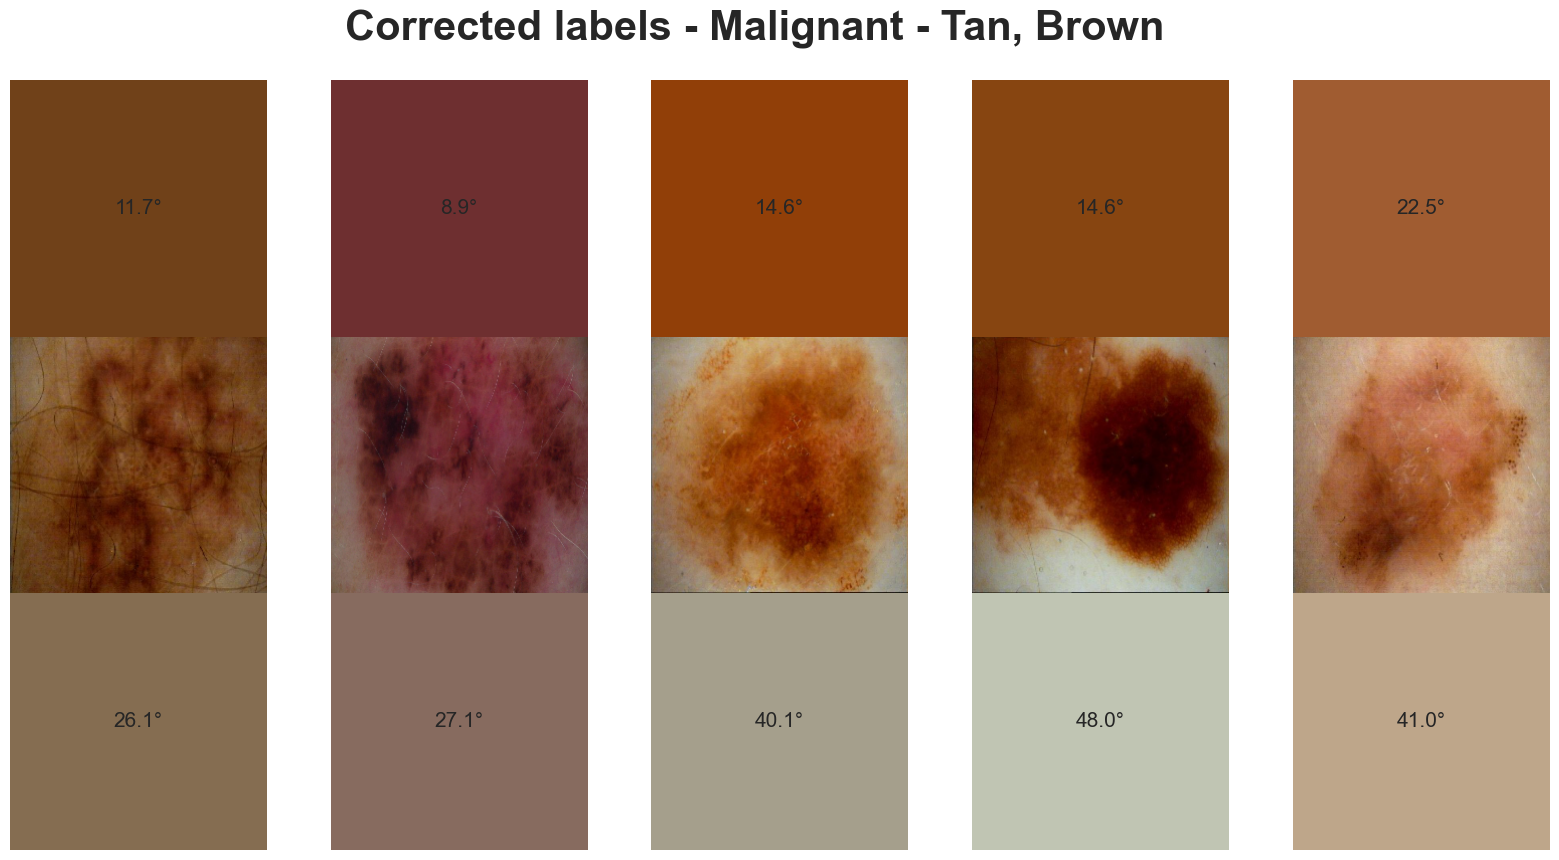

In [42]:
incorrect_indices = [3,10,12,28,34]
fig = plt.figure(figsize=(20,10))
fig.suptitle("Corrected labels - Malignant - Tan, Brown", fontsize=30, fontweight='bold', y=0.95)
grid = GridSpec(1, len(incorrect_indices), figure=fig)

for j, gs in enumerate(grid):
    i = incorrect_indices[j]
    fp, rgb, ita = files[i], rgbs[i], itas[i]
    corr_rgb, corr_ita = corrected_colors[j], corrected_itas[j]
    image = cv2.imread(fp)[:,:,::-1]
    image = cv2.resize(image, (256,256))
    
    sub_grid = gs.subgridspec(3, 1, hspace=0)

    ax_left = fig.add_subplot(sub_grid[1])
    ax_left.imshow(image)
    ax_left.axis("off")

    ax_right = fig.add_subplot(sub_grid[0])
    ax_right.imshow([[rgb]])
    ax_right.text(0, 0, f"{ita:.1f}°", va="center", ha="center", fontsize=15)
    ax_right.axis("off")

    ax_right = fig.add_subplot(sub_grid[2])
    ax_right.imshow([[corr_rgb]])
    ax_right.text(0, 0, f"{corr_ita:.1f}°", va="center", ha="center", fontsize=15)
    ax_right.axis("off")

fig.savefig("Corrected - Malignant, Tan_Brown.png")

In [ ]:
[files[i] for i in incorrect_indices], corrected_itas, corrected_colors, [ita_to_ftp(i) for i in corrected_itas], [ita_to_group(i) for i in corrected_itas]

(['E:\\ISIC 2020\\train\\ISIC_2027582.jpg',
  'E:\\ISIC 2020\\train\\ISIC_3068885.jpg',
  'E:\\ISIC 2020\\train\\ISIC_3394520.jpg',
  'E:\\ISIC 2020\\train\\ISIC_7460887.jpg',
  'E:\\ISIC 2020\\train\\ISIC_9124447.jpg'],
 [np.float64(26.095424157388344),
  np.float64(27.057552910841324),
  np.float64(40.08821182749401),
  np.float64(47.991830745969004),
  np.float64(41.018801343578374)],
 array([[133, 109,  81],
        [135, 107,  95],
        [165, 159, 140],
        [192, 197, 179],
        [190, 166, 138]]),
 ['34', '34', '34', '12', '12'],
 ['Tan', 'Tan', 'Intermediate', 'Light', 'Light'])

## Bibliography

\[1\] Chardon A, Cretois I, Hourseau C. Skin colour typology and suntanning pathways. Int J Cosmet Sci. 1991 Aug